C:\Users\Amalia\AppData\Local\Temp\ipykernel_4000\1001444247.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_1.index, y=frecuencia_1.values, palette='viridis')
C:\Users\Amalia\AppData\Local\Temp\ipykernel_4000\1001444247.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Intervalo', y='Frecuencia', data=frecuencia_2, palette='viridis')


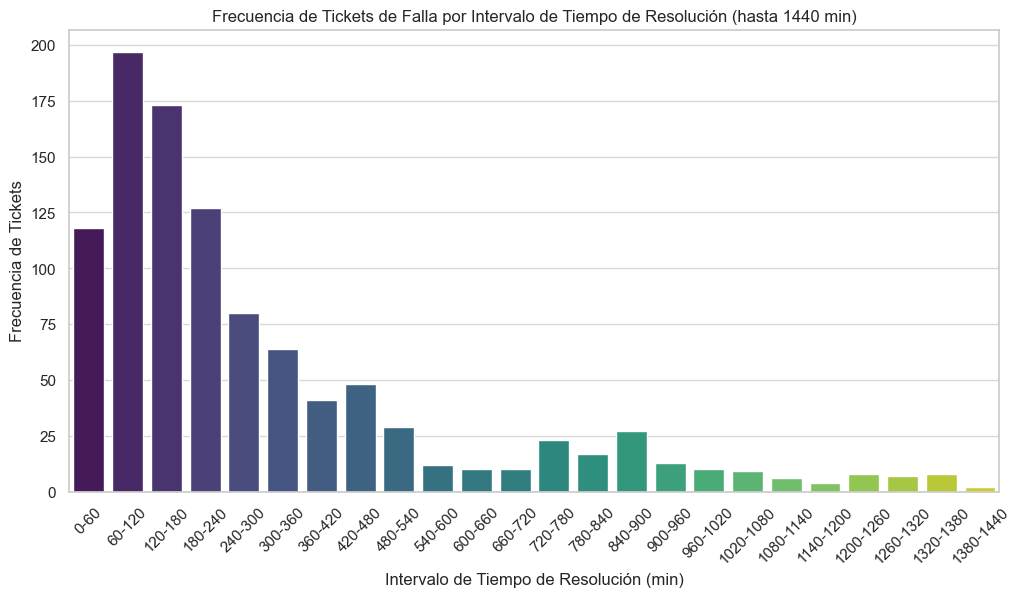

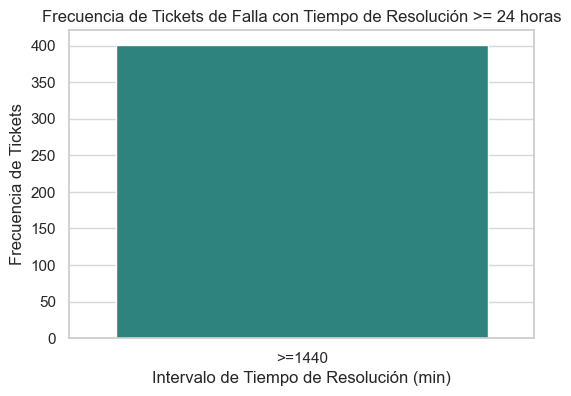

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Crear intervalos de 60 minutos hasta 1440 minutos
bins_1 = range(0, 1441, 60)  # Definir los límites de los intervalos de 0 a 1440 en pasos de 60
labels_1 = [f"{i}-{i + 60}" for i in bins_1[:-1]]  # Crear etiquetas para los intervalos

# Asignar cada tiempo de resolución a su intervalo correspondiente (hasta 1440 min)
data['Intervalo_1'] = pd.cut(data['Tg (min)'], bins=bins_1, labels=labels_1, right=False)

# Contar la frecuencia de tickets en cada intervalo (hasta 1440 min)
frecuencia_1 = data['Intervalo_1'].value_counts().sort_index()

# Crear un DataFrame para los tickets con tiempo de resolución >= 1440 min
data_2 = data[data['Tg (min)'] >= 1440]

# Contar la frecuencia de tickets con tiempo de resolución >= 1440 min
frecuencia_2 = pd.DataFrame({'Intervalo': ['>=1440'], 'Frecuencia': [len(data_2)]})

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el primer gráfico de barras (hasta 1440 min)
plt.figure(figsize=(12, 6))
sns.barplot(x=frecuencia_1.index, y=frecuencia_1.values, palette='viridis')
plt.title('Frecuencia de Tickets de Falla por Intervalo de Tiempo de Resolución (hasta 1440 min)')
plt.xlabel('Intervalo de Tiempo de Resolución (min)')
plt.ylabel('Frecuencia de Tickets')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)

# Crear el segundo gráfico de barras (>=1440 min)
plt.figure(figsize=(6, 4))
sns.barplot(x='Intervalo', y='Frecuencia', data=frecuencia_2, palette='viridis')
plt.title('Frecuencia de Tickets de Falla con Tiempo de Resolución >= 24 horas')
plt.xlabel('Intervalo de Tiempo de Resolución (min)')
plt.ylabel('Frecuencia de Tickets')
plt.grid(axis='y', alpha=0.75)

plt.show()


C:\Users\Amalia\AppData\Local\Temp\ipykernel_1332\2417279239.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')


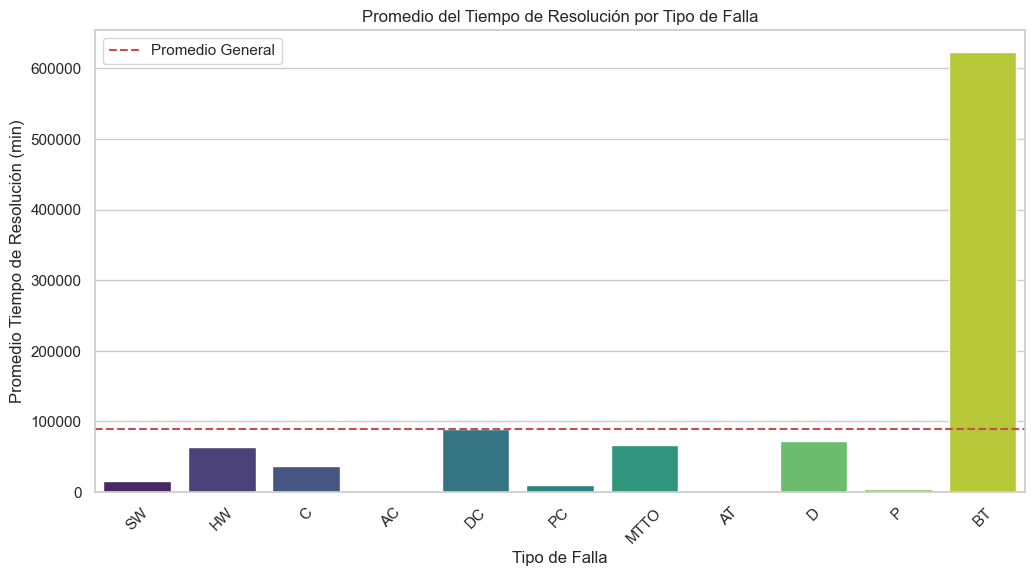

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Convertir la columna 'Tg (min)' a numérico, forzando errores a NaN
data['Tg (min)'] = pd.to_numeric(data['Tg (min)'], errors='coerce')

# Lista de tipos de fallas
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']

# Calcular promedios
promedios = {}
for tipo in tipos_falla:
    promedios[tipo] = data[data[tipo] == 1]['Tg (min)'].mean()

# Crear un DataFrame para los promedios
df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Falla', 'Promedio Tiempo (min)'])

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_promedios, x='Tipo de Falla', y='Promedio Tiempo (min)', palette='viridis')
plt.title('Promedio del Tiempo de Resolución por Tipo de Falla')
plt.xlabel('Tipo de Falla')
plt.ylabel('Promedio Tiempo de Resolución (min)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.axhline(y=df_promedios['Promedio Tiempo (min)'].mean(), color='r', linestyle='--', label='Promedio General')  # Línea media
plt.legend()
plt.show()


### Ahora la regresión lineal múltiple

In [5]:
import numpy as np
import pandas as pd

# Leer los datos del archivo CSV
data = pd.read_csv('Tickets.csv')

# Crear una lista con los nombres de las columnas de tipos de falla
tipos_falla = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
print(data[['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT','Tg (min)']])


# Creando la matriz
# Seleccionar las columnas para X (variables independientes) 
X_columns = ['SW', 'HW', 'C', 'AC', 'DC', 'PC', 'MTTO', 'AT', 'D', 'P', 'BT']
X = data[X_columns].values  # Convertir a un array de NumPy

# Agregar una columna de unos para el intercepto b_0
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Seleccionar la columna para Y (variable dependiente)
Y = data['Tg (min)'].values  # Convertir a un array de NumPy

print("Matriz X:")
print(X)

print("\nVector Y:")
print(Y)


# Calcular los coeficientes β
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)

print("Coeficientes β:")
print(beta)


      SW  HW  C  AC  DC  PC  MTTO  AT  D  P  BT  Tg (min)
0      1   0  0   0   0   0     0   0  0  0   0     14111
1      1   0  0   0   0   0     0   0  0  0   0     14552
2      1   0  0   0   0   0     0   0  0  0   0     26101
3      1   0  0   0   0   0     0   0  0  0   0     37930
4      0   1  0   0   0   0     0   0  0  0   0      4246
...   ..  .. ..  ..  ..  ..   ...  .. .. ..  ..       ...
1443   0   0  0   1   0   0     0   0  0  0   0       112
1444   0   0  0   1   0   0     0   0  0  0   0       938
1445   0   0  0   0   0   0     1   0  0  0   0    121984
1446   0   0  0   0   1   0     0   0  0  0   0      1379
1447   0   1  0   0   0   0     0   0  0  0   0      3917

[1448 rows x 12 columns]
Matriz X:
[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]

Vector Y:
[ 14111  14552  26101 ... 121984   1379   3917]
Coeficientes β:
[-65536.      0.  98304.  32768.  327

2. Cálculo de los Coeficientes (β_i)  
  
Para calcular los coeficientes de la regresión lineal múltiple, puedes usar la fórmula de mínimos cuadrados. La matriz que se utiliza para calcular los coeficientes es:  
  
  
    β = (X^T X)^-1 X^T Y  

  
Donde:  
- X es la matriz de tus variables independientes (incluyendo la columna de unos para el intercepto).  
- Y es el vector de tu variable dependiente (tiempo en minutos).  

Interpretación de los Coeficientes  
  
1. Intercepto: El primer valor (-65536.0) es el intercepto de la regresión. Esto significa que si todas las variables independientes son cero, el modelo predice un valor de -65536.0 para \\( Y \\).  
    
2. Coeficientes de Variables: Los siguientes valores corresponden a cada variable independiente en el orden en que las definiste en \\( X_columns \\). Por ejemplo:  
   - El coeficiente de SW es 0, lo que indica que no tiene efecto en la variable dependiente \\( Y \\).  
   - El coeficiente de HW es 98304.0, lo que significa que por cada unidad que aumenta HW, \\( Y \\) aumenta en 98304.0, manteniendo constantes las otras variables.  

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
Y = np.array([10, 12, 8, 15, 11, 9, 13, 10, 12, 14])
X = np.array([[5, 2, 1],
              [6, 3, 2],
              [4, 1, 0],
              [7, 4, 3],
              [5, 2, 1],
              [4, 1, 0],
              [6, 3, 2],
              [5, 2, 1],
              [6, 3, 2],
              [7, 4, 3]])

# Agregar un término de intercepto
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calcular los coeficientes usando la fórmula de mínimos cuadrados
beta = np.linalg.inv(X.T @ X) @ X.T @ Y
Y_pred = X @ beta

# Calcular residuos
residuos = Y - Y_pred

# Graficar residuos vs valores ajustados
plt.scatter(Y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Valores Ajustados')
plt.show()


# Calcular la correlación de los residuos
correlacion_residuos = np.corrcoef(residuos[:-1], residuos[1:])[0, 1]
print(f'Correlación entre residuos: {correlacion_residuos:.4f}')

# Graficar residuos vs valores ajustados para verificar homocedasticidad
plt.scatter(Y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Valores Ajustados para Homocedasticidad')
plt.show()

# Histograma de residuos
plt.hist(residuos, bins=10, edgecolor='black')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico Q-Q
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos')
plt.show()

# Calcular la matriz de correlación
correlacion_X = np.corrcoef(X[:, 1:], rowvar=False)
print('Matriz de Correlación de Variables Independientes:')
print(correlacion_X)


LinAlgError: Singular matrix